## Unsupervised learning - Clustering
Clustering is the task of gathering samples into groups of similar
samples according to some predefined similarity or dissimilarity
measure (such as the Euclidean distance).
In this section we will explore a basic clustering task on the
iris data.

By the end of this section you will

- Know how to instantiate and train KMeans, an unsupervised clustering algorithm
- Know several other interesting clustering algorithms within scikit-learn

In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, y = make_blobs(random_state=42)
X.shape
#sklearn.datasets.

(100L, 2L)

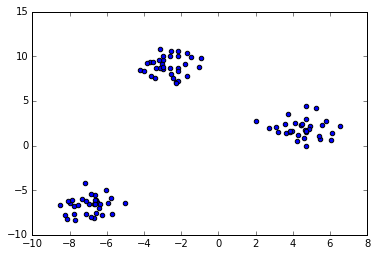

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 2, 0])

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()
y

### Generate model for clustering
sklearn.cluster has a variety of clustering algorithms. We'll use KMeans to build a model for clustering the data.

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

### Fit the model to the data

In [5]:
labels = kmeans.fit_predict(X) ## fit() can also be used
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2])

### Visualize the data with original and predicted labels

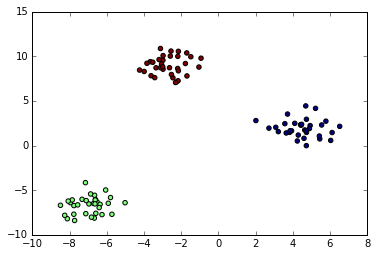

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=labels);
plt.show()

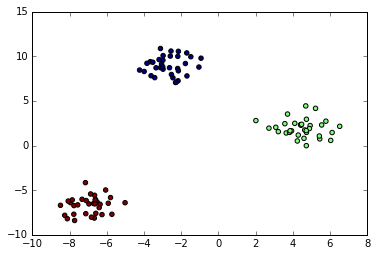

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [9]:
## Compare the labels
all(y == labels)

False

Predicted label are NOT same a the input labels. Why?

In [10]:
from sklearn.metrics import accuracy_score

print('Accuracy score:', accuracy_score(y, labels))


('Accuracy score:', 0.0)


In [11]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, labels)

1.0

## Exercise

In [12]:
## Make an S-curve with 1000 points
from sklearn.datasets import make_s_curve
data, colors = make_s_curve(n_samples=1000)
print(data.shape)
print(colors.shape)

(1000L, 3L)
(1000L,)


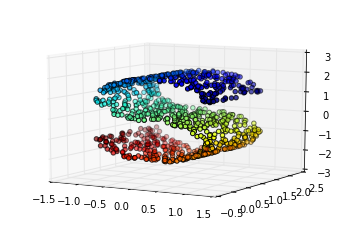

In [13]:
## Plot the S-curve
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors,cmap='jet')
ax.view_init(10, -60)
plt.show()

### Generate a model for clustering the points in the S-curve and plot the clustering results

In [ ]:
## Answer [Hint: Construct a model, fit the model to data, plot]
from sklearn.datasets import make_s_curve
data, colors = make_s_curve(n_samples=1000)


###   
###   
###   
###    

### Solution

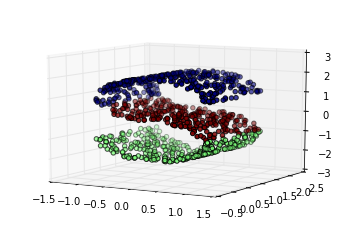

In [38]:
kmeans2 = KMeans(n_clusters=3, random_state=42)
labels2 = kmeans2.fit_predict(data)
ax = plt.axes(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels2)
ax.view_init(10, -60)
plt.show()
KMeans?

### k-means is limited to linear cluster boundaries
The fundamental model assumptions of *k*-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between *k*-means clusters will always be linear, which means that it will fail for more complicated boundaries.
Consider the following data, along with the cluster labels found by the typical *k*-means approach:

In [35]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

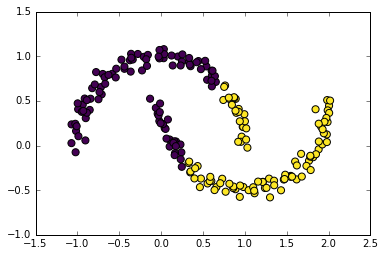

In [36]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.show()

Conceptually, we can use a kernel transformation to project the data into a higher dimension where a linear separation is possible. This would allow *k*-means to discover non-linear boundaries.

One version of this kernelized *k*-means is implemented in Scikit-Learn within the ``SpectralClustering`` estimator.
It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a *k*-means algorithm:

C:\Users\AU\Anaconda\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


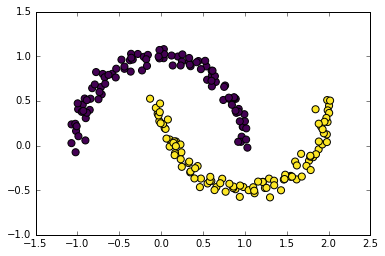

In [37]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.show()

We see that with this kernel transform approach, the kernelized *k*-means is able to find the more complicated nonlinear boundaries between clusters.

### For more details refer - In Depth: k-Means Clustering (Python Data Science Handbook)